# Q3.a.1 Streaming data visualisation

'this is a message<kafka.consumer.group.KafkaConsumer object at 0x7f7df0aa7cc0>'


<IPython.core.display.Javascript object>


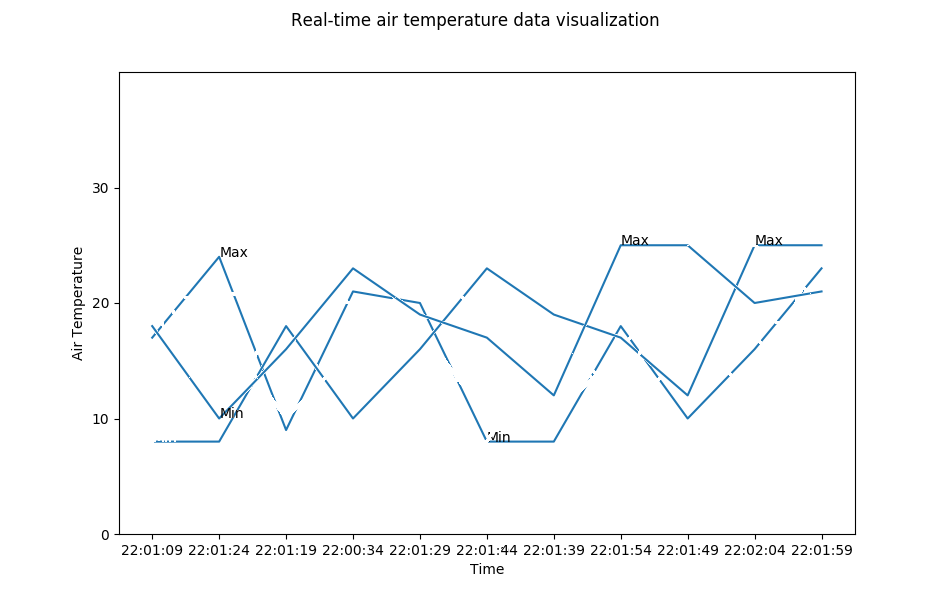

KeyboardInterrupt: 

In [1]:
# import statements
from pprint import pprint
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib.pyplot as plt
import json, ast

%matplotlib notebook

topic = 'climate_hotspot'

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=1000000, 
                                   auto_offset_reset='earliest', 
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer
        

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) 
        ax = fig.add_subplot(111) 
        fig.suptitle('Real-time air temperature data visualization')
        ax.set_xlabel('Time')
        ax.set_ylabel('Air Temperature')
        ax.set_ylim(0,40) 
        ax.set_yticks([0,10,20,30])
        fig.show()
        fig.canvas.draw() 
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    try:
        x, y = [], []
        for message in consumer:
            data = str(message.value.decode('utf-8')).split('&')
            dic = ast.literal_eval(data[2])
            
            if 'Climate' in dic.keys():
                x.append(data[0])
                z = dic['Climate']['air_temperature_celcius']

                y.append(int(z))
            
            if len(y) > 10:
                ax.clear()
                y_max = max(y)
                x_max_in = y.index(y_max)
                x_max = x[x_max_in]
                ax.annotate("Max", xy = (x_max,y_max))
                y_min = min(y)
                x_min_in = y.index(y_min)
                x_min = x[x_min_in]
                ax.annotate("Min", xy = (x_min,y_min))
                ax.plot(x,y)
                ax.set_xlabel('Time')
                ax.set_ylabel('Air Temperature')
                ax.set_ylim(0,40) 
                ax.set_yticks([0,10,20,30])
                fig.canvas.draw()
                x.pop(0) 
                y.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
        
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    pprint('this is a message' + str(consumer))
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)
    
    

# Q3.b.i

In [2]:
from pymongo import MongoClient
client = MongoClient()
db = client.fit5148_assignment_db

/home/student/.local/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


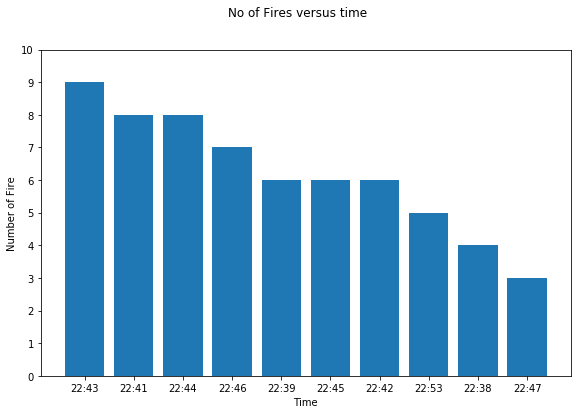

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
no_fire = db.taskC.aggregate([{'$group':{'_id': {'Createdtime': {'$substr': ['$Date',0,5]},'hotspotData': '$hotspot_data'},'numberOfFires': {'$sum' : 1}}},
                            {'$sort' : {'numberOfFires' : -1}},{'$limit':10},{'$project': {'CreationTime':'$_id.Createdtime','_id':0,'numberOfFires':1}}])
cTime=[]    
Nfire=[]

for x in no_fire:
    cTime.append(x['CreationTime'])
    Nfire.append(x['numberOfFires'])


width = 9.5
height = 6
fig = plt.figure(figsize=(width,height)) #
ax = fig.add_subplot(111) 
fig.suptitle('No of Fires versus time') 
ax.set_xlabel('Time')
ax.set_ylabel('Number of Fire')
plt.bar(cTime,Nfire)
ax.set_ylim(0,10) 
ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10])
fig.show() 
fig.canvas.draw()


# Q3.b.ii

In [6]:
!pip3 install sodapy
!pip3 install gmplot

  Using cached https://files.pythonhosted.org/packages/11/02/5baf6e10a47018babcc43e3ed03a6f13712187f4ab1fbe263b479c77d117/sodapy-1.5.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/51/bd/23c926cd341ea6b7dd0b2a00aba99ae0f828be89d72b2190f27c11d4b7fb/requests-2.22.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e6/60/247f23a7121ae632d62811ba7f273d0e58972d75e58a94d329d51550a47d/urllib3-1.25.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/60/75/f692a584e85b7eaba0e03827b3d51f45f571c2e793dd731e598828d380aa/certifi-2019.3.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/2c/cd551d81dbe15200be1cf41cd03869a46fe7226e7450af7a6545bfc474c9/idna-2.8-py2.py3-none-any.whl
You are using pip version 8.1.1, however version 19.1.1 is

In [4]:
from pymongo import MongoClient
client = MongoClient()
db = client.fit5148_assignment_db
taskC = db.taskC

In [5]:
import gmplot
gmap = gmplot.GoogleMapPlotter(-37.812015244225677, 144.951471202974, 5)

In [6]:
for element in taskC.find({'hotspot_data':{'$exists': True }},{'_id':0,'hotspot_data.latitude':1,'hotspot_data.longitude':1,
                        'hotspot_data.surface_temperature_celcius':1,'hotspot_data.confidence':1,'Climate.air_temperature_celcius':1, 'Climate.relative_humidity':1 }):
    surfaceTemp = element['hotspot_data']['surface_temperature_celcius']
    relativeHumidity = element['Climate']['relative_humidity']
    airTemperature = element['Climate']['air_temperature_celcius']
    confidence=element['hotspot_data']['confidence']
    gmap.marker(float(element['hotspot_data']['latitude']),float(element['hotspot_data']['longitude']),
                color = '#FF0000', title = ('Relative Humidity ' + str(relativeHumidity) +' , ' + 'Air Temperature ' + str(airTemperature) +' , ' +
                'Confidence ' + str(confidence)+','+'Surface Temperature '+ str(surfaceTemp)))

In [7]:
import webbrowser
gmap.draw("HotspotMap.html")
webbrowser.open_new("HotspotMap.html")

True